In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import plot_model
import pickle

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 256)           658688    
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 128)            163968    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 128)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 3, 564)            1563408   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               1681408   
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 2573)              6

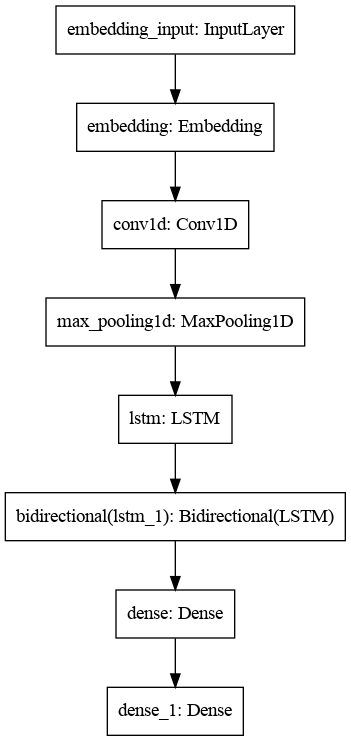

In [36]:

sequence_length = 10
model = load_model("/home/chris/Downloads/N_word_model.h5")
tokenizer = pickle.load(open("/home/chris/Downloads/tokenizer1.pkl", "rb"))
model.trainable= False
model.summary()
plot_model(model)

In [138]:

text = "this is a text for testing what is about model we"

def predicted(text, model=model, tokenizer=tokenizer, verbose=0, future=5):
    m = 0
    generated = text+" "
    encoded_sentece = tokenizer.texts_to_sequences(text)
    encoded_sentece = [(k) for v in encoded_sentece if len(v) > 0 
                    for k in v]
    if verbose == 0:
        pass
    elif verbose == 1:
        print([encoded_sentece])
    else:
        pass
    
    encoded_sentece = pad_sequences([encoded_sentece], sequence_length)
    for _ in range(future):
        pred = np.argmax(model.predict((encoded_sentece)))
        preds = model.predict(encoded_sentece)
        new = encoded_sentece.tolist()[0]
        new.remove(new[0])
        new.append(pred)
        encoded_sentece = np.array([new])
        for score in preds.tolist()[0]:
            m = score if score>m else m
        for k,v in tokenizer.word_index.items():
            if verbose==0:
                pass
            elif verbose==1:
                if v == pred:
                    print(f"Predicted word is :: {k} ==>Proba :: {m*100}".center(45, "="))
                    generated += " "+k
            else:
                pass
    print(generated)

In [139]:
predicted(text = text+" for building a future", future=10, verbose=1)


[[61, 41, 17, 41, 17, 13, 61, 61, 402, 61, 17, 61, 41, 13, 61, 41, 17, 13, 402, 61, 221, 402, 257, 402, 41, 257, 41, 13, 61]]
Predicted word is :: seen ==>Proba :: 12.559393048286438
Predicted word is :: all ==>Proba :: 39.98787999153137
Predicted word is :: a ==>Proba :: 60.3696346282959
Predicted word is :: sound ==>Proba :: 60.3696346282959
Predicted word is :: take ==>Proba :: 60.3696346282959
Predicted word is :: gregor ==>Proba :: 77.61825323104858
Predicted word is :: s ==>Proba :: 99.98255372047424
Predicted word is :: head ==>Proba :: 99.98255372047424
Predicted word is :: in ==>Proba :: 99.98255372047424
Predicted word is :: his ==>Proba :: 99.99555349349976
this is a text for testing what is about model we for building a future  seen all a sound take gregor s head in his
